<h3>Import Packages </h3>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
sns.set(color_codes = True)
from tensorflow import math
import os
import tensorflow as tf
import pandas as pd
import matplotlib.pyplot as plt
from keras.layers import *
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, MinMaxScaler
import plotly.offline as py
py.init_notebook_mode(connected=True)
import plotly.graph_objs as go
import plotly.tools as tls
import plotly.figure_factory as f
#ignore warning messages 
import warnings
warnings.filterwarnings('ignore')

<h3>Read Dataset

In [2]:
columns=['Sample code number','Clump Thickness','Uniformity of Cell Size','Uniformity of Cell Shape','Marginal Adhesion','Single Epithelial Cell Size','Bare Nuclei','Bland Chromatin','Normal Nucleoli','Mitoses','Class']
ds = pd.read_csv("/content/breast-cancer-wisconsin.data" ,sep = ',' , names= columns)

<h3>Information:<h3>

Features are computed from a digitized image of a fine needle aspirate (FNA) of a breast mass. They describe characteristics of the cell nuclei present in the image.

In [3]:
ds.head(10)

,Sample code number,Clump Thickness,Uniformity of Cell Size,Uniformity of Cell Shape,Marginal Adhesion,Single Epithelial Cell Size,Bare Nuclei,Bland Chromatin,Normal Nucleoli,Mitoses,Class
0,1000025,5,1,1,1,2,1,3,1,1,2
1,1002945,5,4,4,5,7,10,3,2,1,2
2,1015425,3,1,1,1,2,2,3,1,1,2
3,1016277,6,8,8,1,3,4,3,7,1,2
4,1017023,4,1,1,3,2,1,3,1,1,2
5,1017122,8,10,10,8,7,10,9,7,1,4
6,1018099,1,1,1,1,2,10,3,1,1,2
7,1018561,2,1,2,1,2,1,3,1,1,2
8,1033078,2,1,1,1,2,1,1,1,5,2
9,1033078,4,2,1,1,2,1,2,1,1,2


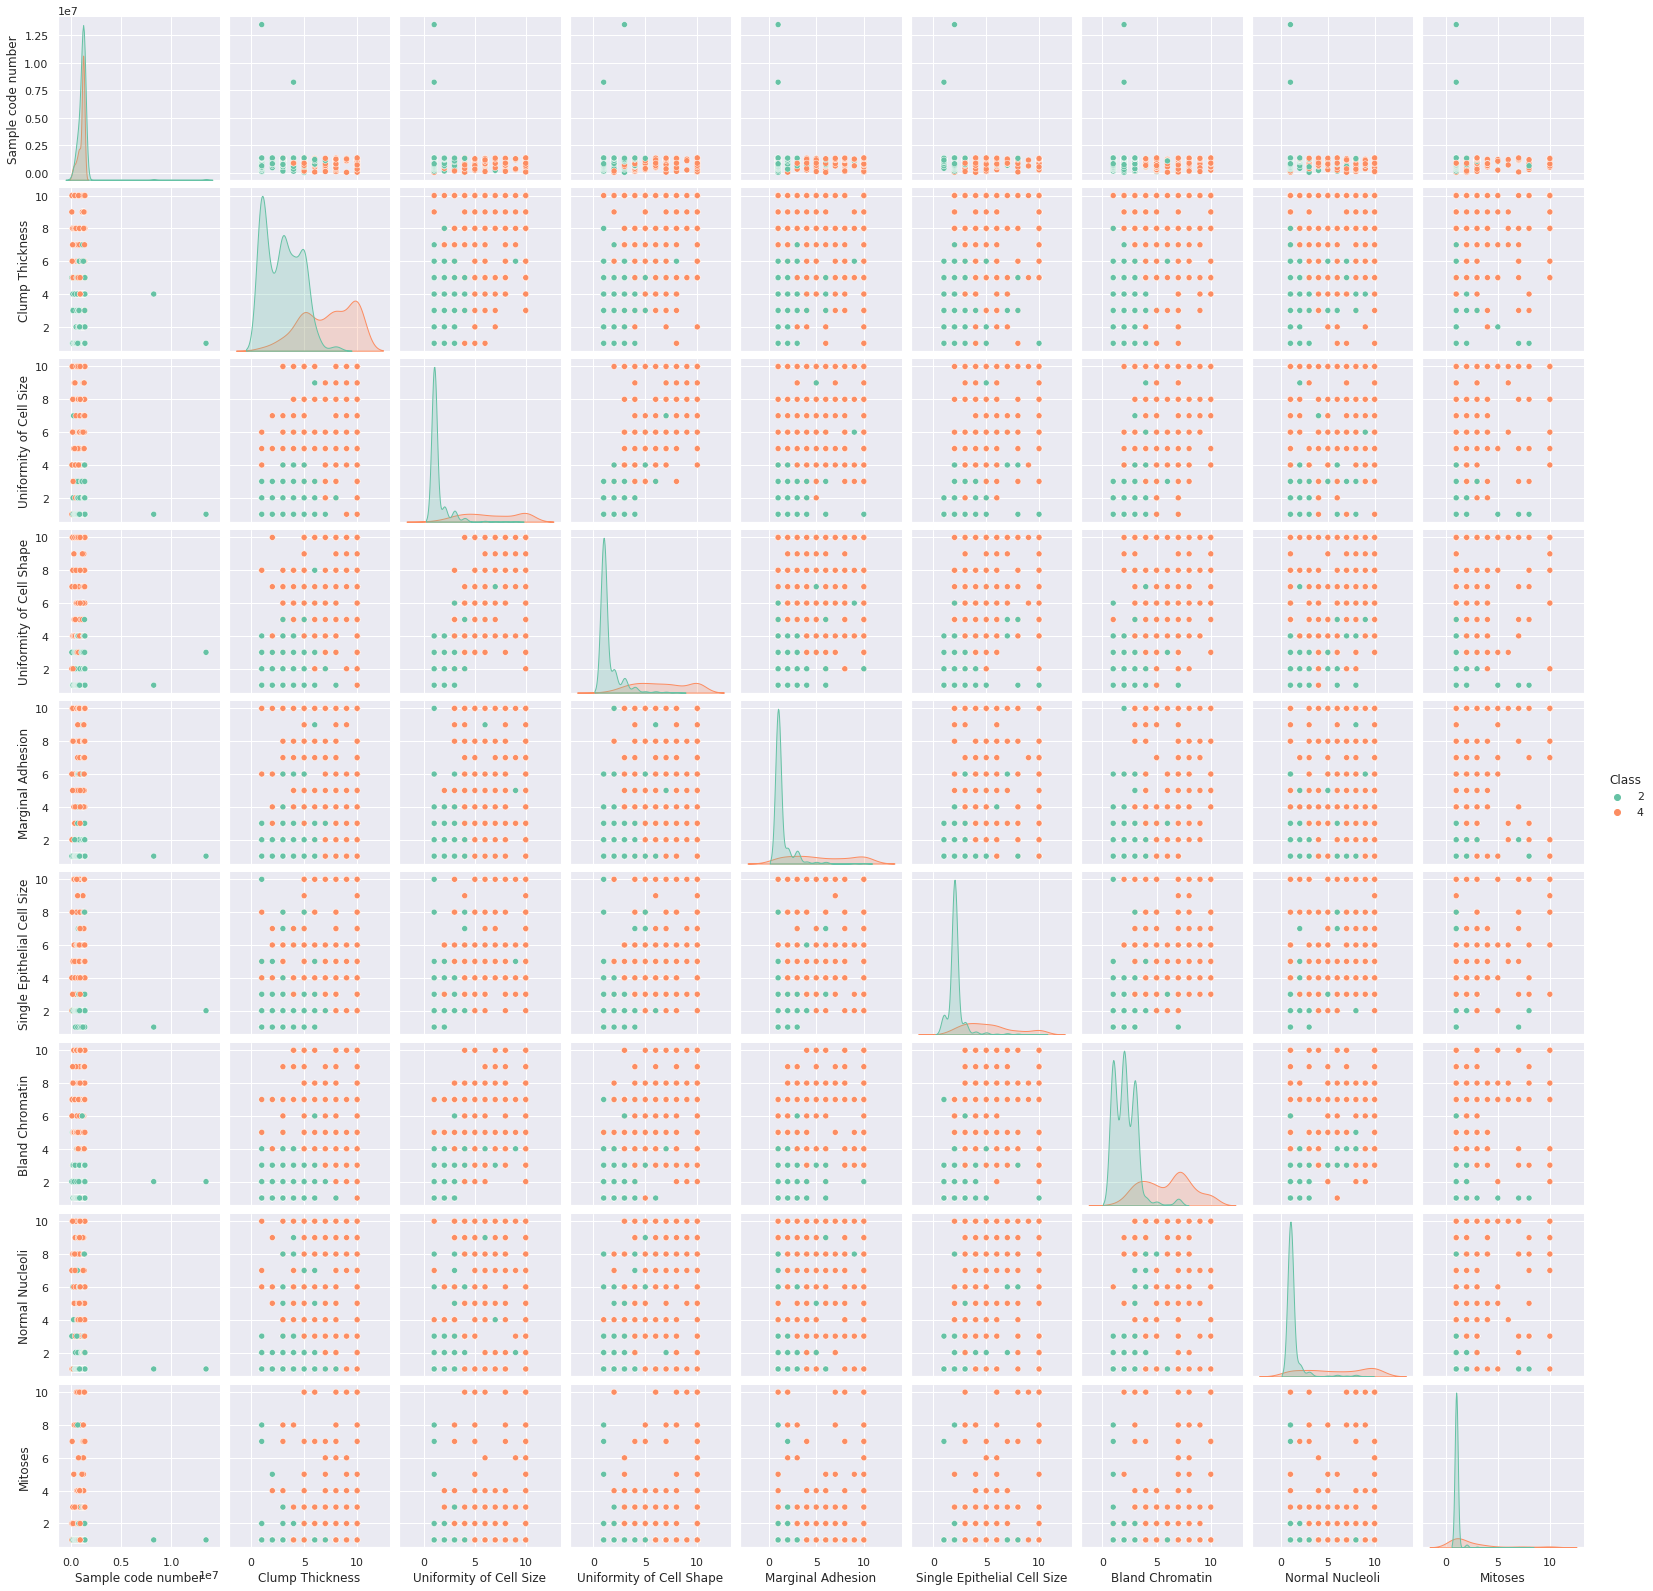

In [4]:
plt.rcParams['font.size']= 10
sns.pairplot(ds,hue='Class', palette='Set2')

<h3> Reassign target and drop useless features

In [5]:
for x in columns:
    print("Number of missing values in ", x, ds[ds[x] == '?'].shape[0])

Number of missing values in  Sample code number 0
Number of missing values in  Clump Thickness 0
Number of missing values in  Uniformity of Cell Size 0
Number of missing values in  Uniformity of Cell Shape 0
Number of missing values in  Marginal Adhesion 0
Number of missing values in  Single Epithelial Cell Size 0
Number of missing values in  Bare Nuclei 16
Number of missing values in  Bland Chromatin 0
Number of missing values in  Normal Nucleoli 0
Number of missing values in  Mitoses 0
Number of missing values in  Class 0


Now we can see the value of Bare Nuclei has 16 missing value , we replace missing value with 0 :

In [6]:
ds['Bare Nuclei'] = ds['Bare Nuclei'].replace(to_replace='?',value = 0).astype(int)

<h2>Exploratory Data Analysis (EDA)

In [7]:
ds.shape

(699, 11)

In [8]:
ds.describe()

,Sample code number,Clump Thickness,Uniformity of Cell Size,Uniformity of Cell Shape,Marginal Adhesion,Single Epithelial Cell Size,Bare Nuclei,Bland Chromatin,Normal Nucleoli,Mitoses,Class
count,6.990000e+02,699.000000,699.000000,699.000000,699.000000,699.000000,699.000000,699.000000,699.000000,699.000000,699.000000
mean,1.071704e+06,4.417740,3.134478,3.207439,2.806867,3.216023,3.463519,3.437768,2.866953,1.589413,2.689557
std,6.170957e+05,2.815741,3.051459,2.971913,2.855379,2.214300,3.640708,2.438364,3.053634,1.715078,0.951273
min,6.163400e+04,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,2.000000
25%,8.706885e+05,2.000000,1.000000,1.000000,1.000000,2.000000,1.000000,2.000000,1.000000,1.000000,2.000000
50%,1.171710e+06,4.000000,1.000000,1.000000,1.000000,2.000000,1.000000,3.000000,1.000000,1.000000,2.000000
75%,1.238298e+06,6.000000,5.000000,5.000000,4.000000,4.000000,5.000000,5.000000,4.000000,1.000000,4.000000
max,1.345435e+07,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,4.000000


In [9]:
ds.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 699 entries, 0 to 698
Data columns (total 11 columns):
 #   Column                       Non-Null Count  Dtype
---  ------                       --------------  -----
 0   Sample code number           699 non-null    int64
 1   Clump Thickness              699 non-null    int64
 2   Uniformity of Cell Size      699 non-null    int64
 3   Uniformity of Cell Shape     699 non-null    int64
 4   Marginal Adhesion            699 non-null    int64
 5   Single Epithelial Cell Size  699 non-null    int64
 6   Bare Nuclei                  699 non-null    int64
 7   Bland Chromatin              699 non-null    int64
 8   Normal Nucleoli              699 non-null    int64
 9   Mitoses                      699 non-null    int64
 10  Class                        699 non-null    int64
dtypes: int64(11)
memory usage: 60.2 KB


In [10]:
ds.Class.unique()
#data.differentiate.unique()

array([2, 4])

Diagnosis (2 = Benign , 4 = Malignant)

In [11]:
 #Reassign target
ds.Class.replace(to_replace = dict( B = 2 , M = 4), inplace = True)

In [12]:
# 2 datasets
M = ds[(ds['Class'] != 0)]
B = ds[(ds['Class'] == 0)]

Text(0, 0.5, 'Count of People')

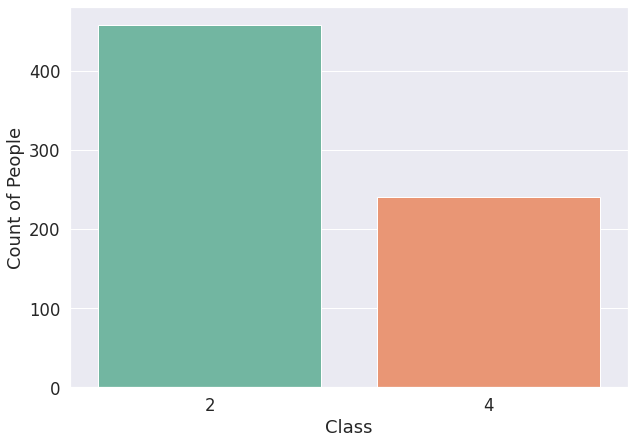

In [13]:
plt.figure(figsize=(10,7))
sns.set(font_scale = 1.5)
sns.countplot(x = 'Class', data=ds, palette="Set2")
plt.ylabel('Count of People')

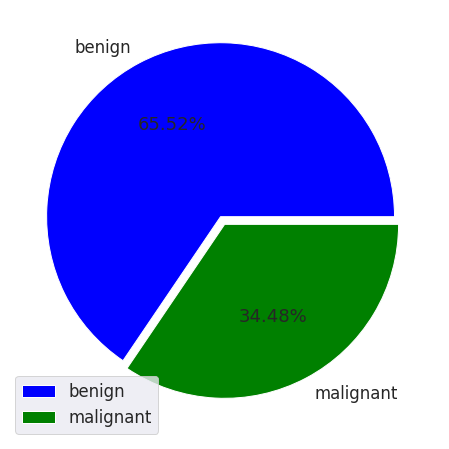

In [14]:
plt.figure(figsize=(8,8))
pieC = ds['Class'].value_counts()
explode = (0.05, 0)
colors = ['blue', 'green']
labels = ['benign', 'malignant']
sns.set(font_scale = 1.5)
plt.pie(pieC, labels = ('benign', 'malignant'), autopct = "%.2f%%", explode = explode, colors = colors)
plt.legend(labels, loc = 'lower left')

 <h4>Visualization for understanding and analyzing the distribution of data for different variables

 In the Class Parameter  : 2 = Benign , 4 = Malignant 

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fda555b7a60>,
      dtype=object)

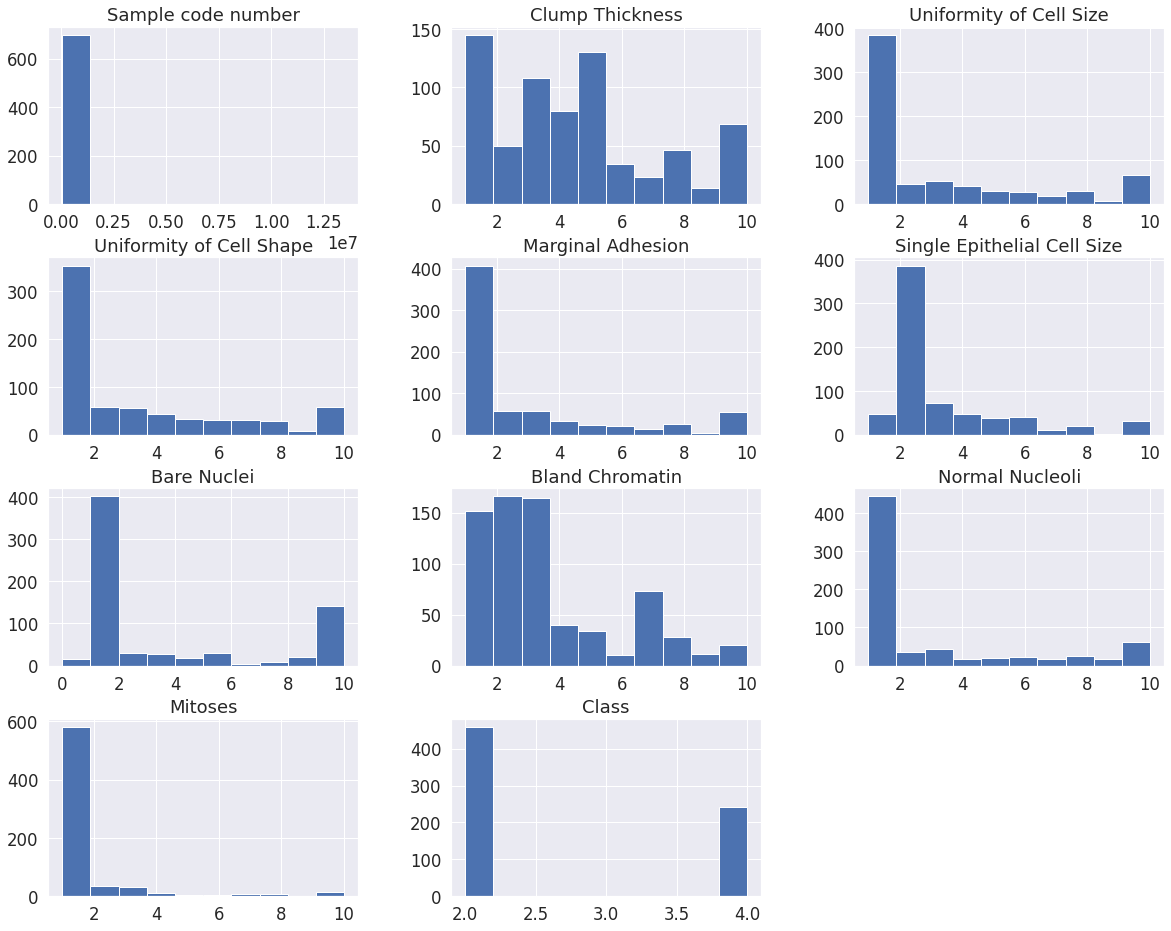

In [15]:
ds.hist(figsize = (20,16),grid=True)

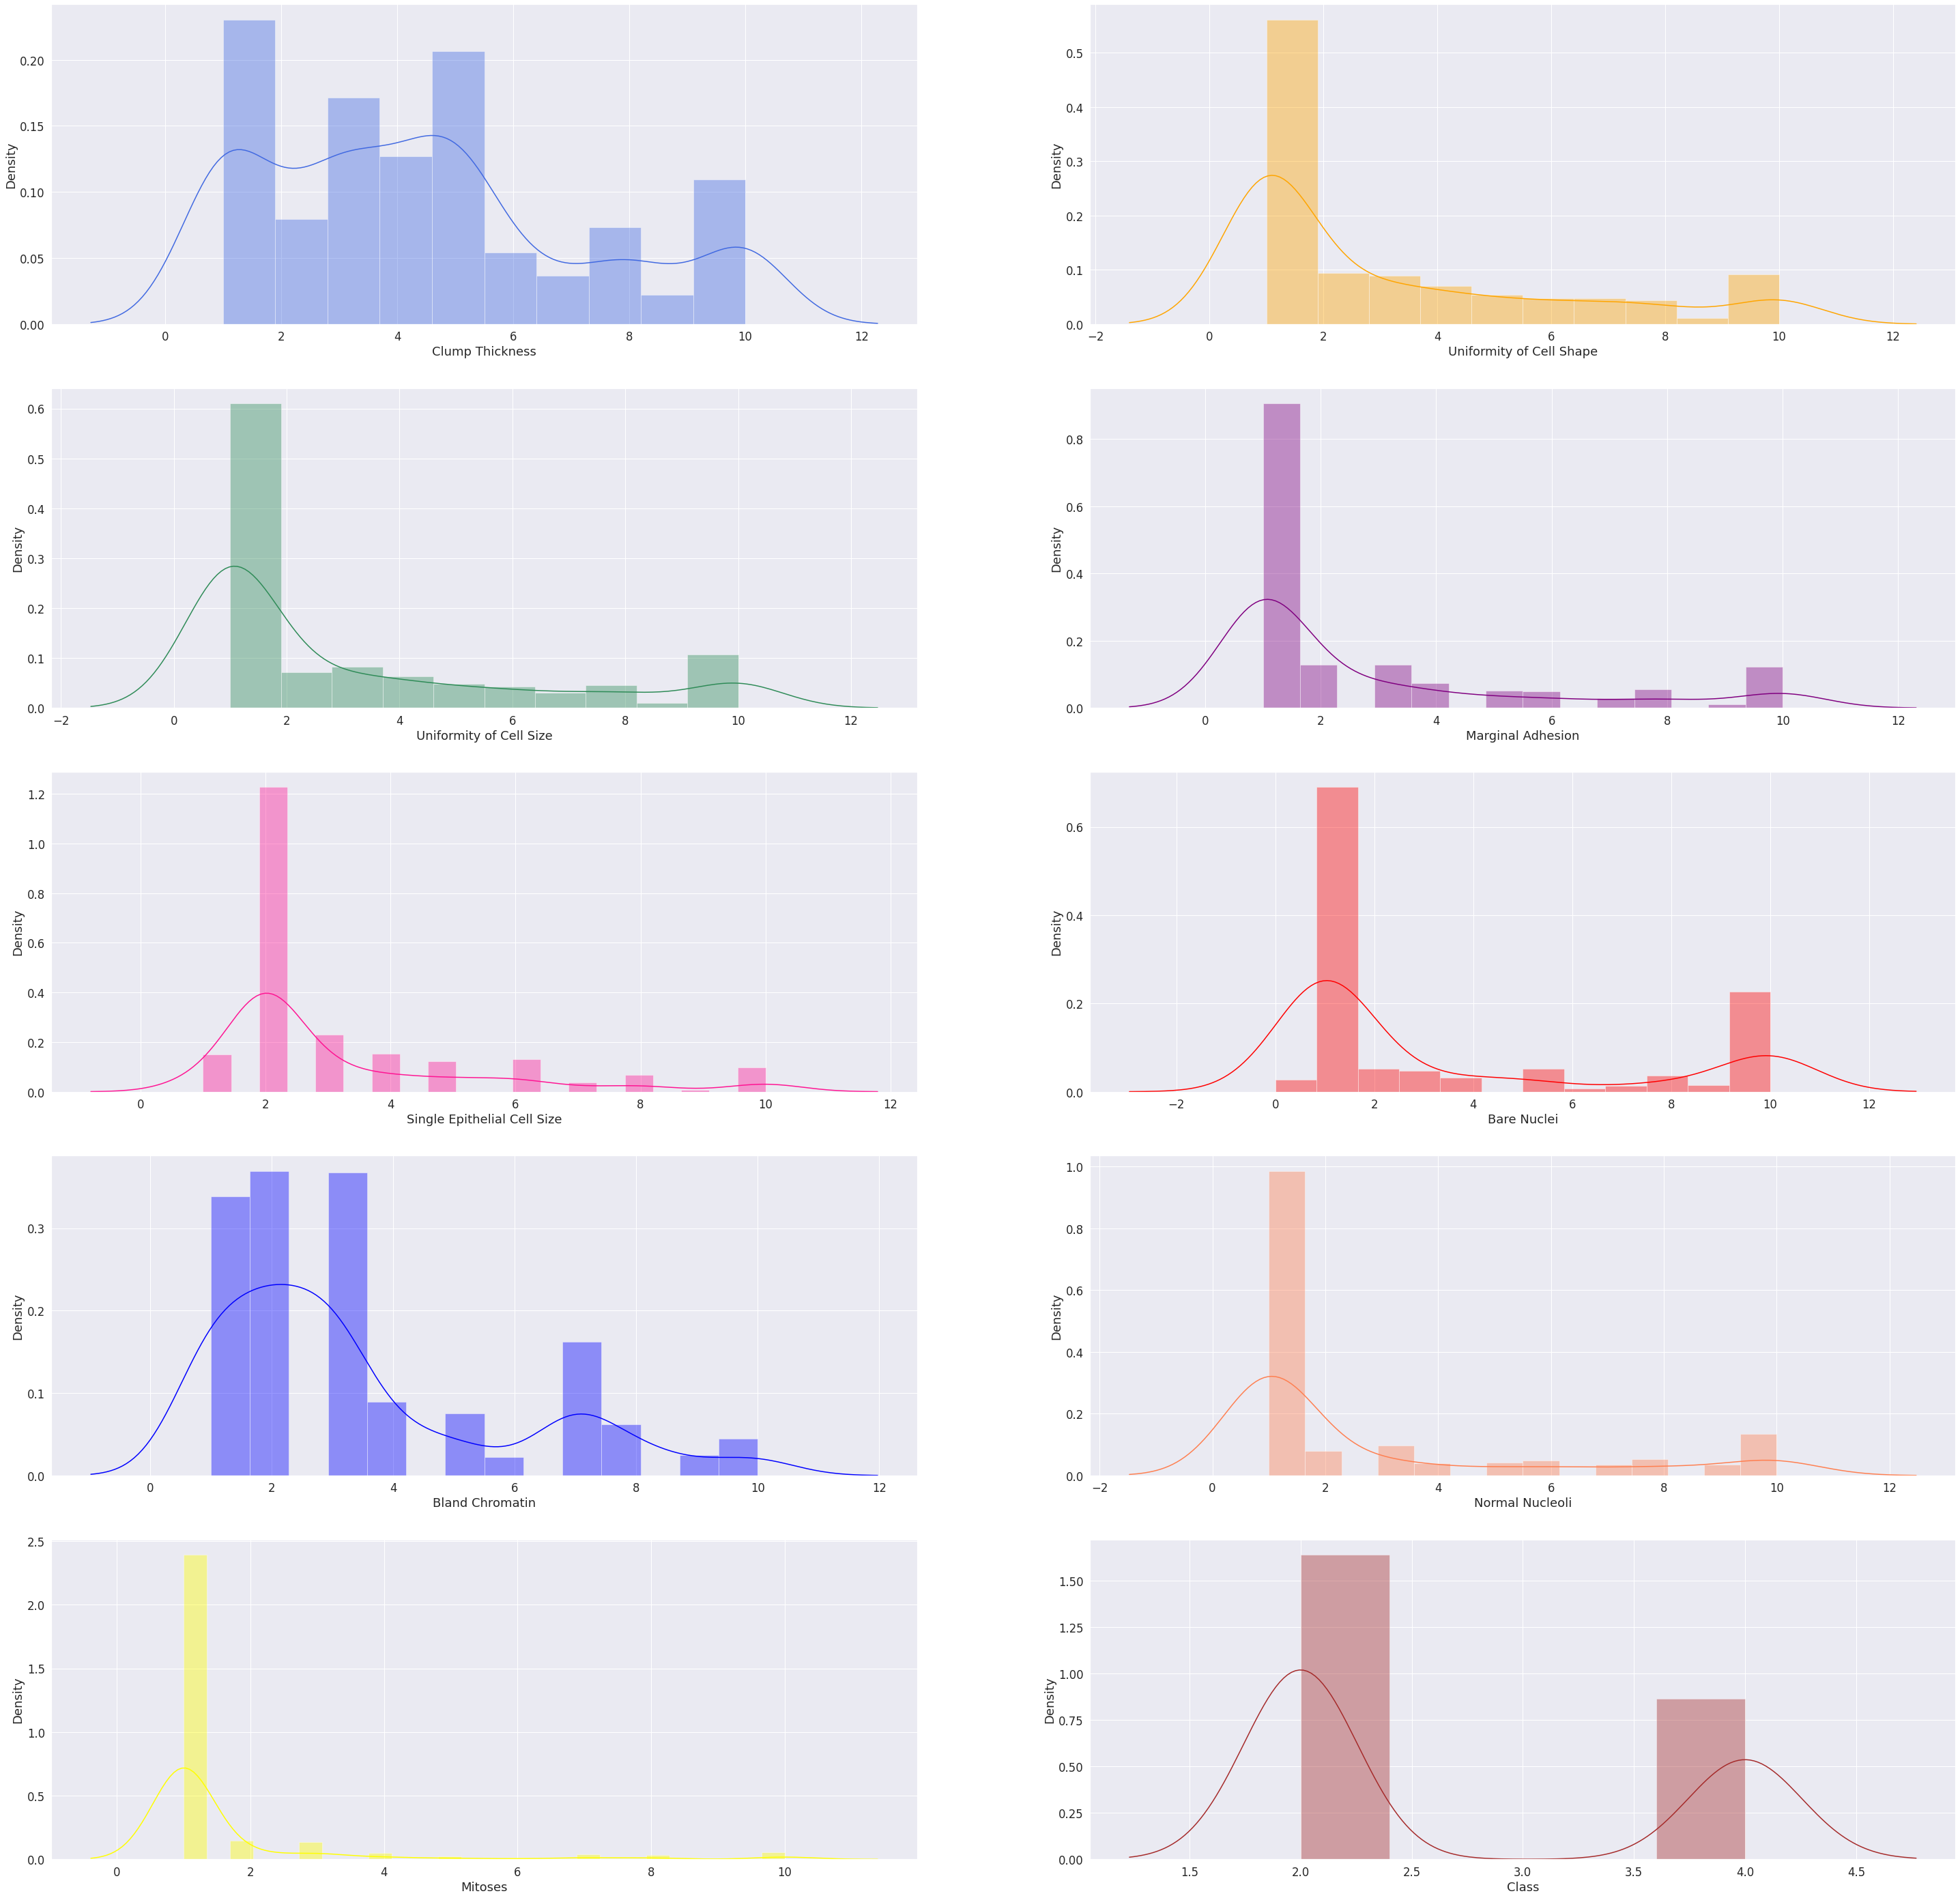

In [16]:
fig, ax = plt.subplots(5,2, figsize=(50,50))
sns.set(font_scale = 3)
sns.distplot(ds['Clump Thickness'], ax = ax[0,0], color = 'royalblue')
sns.distplot(ds['Uniformity of Cell Size'], ax = ax[1,0], color = 'seagreen')
sns.distplot(ds['Uniformity of Cell Shape'], ax = ax[0,1], color = 'orange')
sns.distplot(ds['Marginal Adhesion'], ax = ax[1,1], color = 'purple')
sns.distplot(ds['Single Epithelial Cell Size'], ax = ax[2,0], color = 'deeppink')
sns.distplot(ds['Bare Nuclei'], ax = ax[2,1], color = 'red')
sns.distplot(ds['Bland Chromatin'], ax = ax[3,0], color = 'blue')
sns.distplot(ds['Normal Nucleoli'], ax = ax[3,1], color = 'coral')
sns.distplot(ds['Mitoses'], ax = ax[4,0], color = 'yellow')
sns.distplot(ds['Class'], ax = ax[4,1], color = 'brown')


<h3>Attributes frequency respect to class attribute

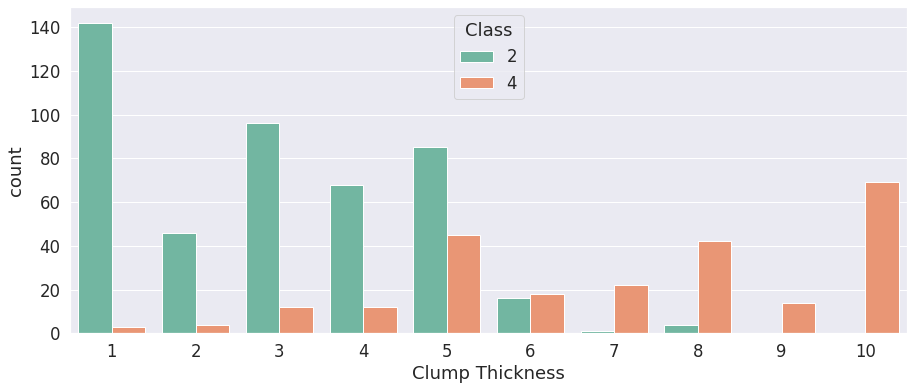

In [17]:
plt.figure(figsize=(15,6))
sns.set(font_scale = 1.5)
sns.countplot(x = 'Clump Thickness', hue = 'Class', data = ds, palette = 'Set2')

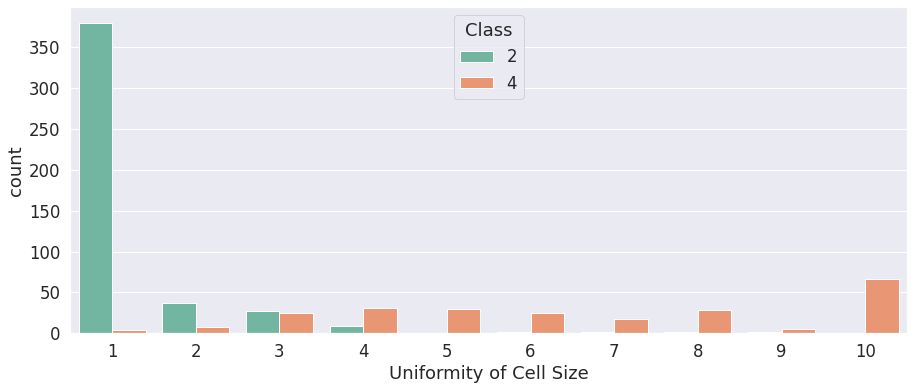

In [18]:
plt.figure(figsize=(15,6))
sns.set(font_scale = 1.5)
sns.countplot(x = 'Uniformity of Cell Size', hue = 'Class', data = ds, palette = 'Set2')

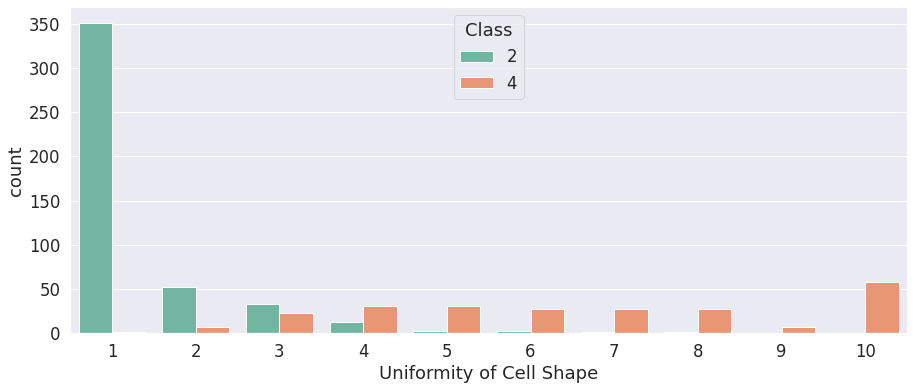

In [19]:
plt.figure(figsize=(15,6))
sns.set(font_scale = 1.5)
sns.countplot(x = 'Uniformity of Cell Shape', hue = 'Class', data = ds, palette = 'Set2')

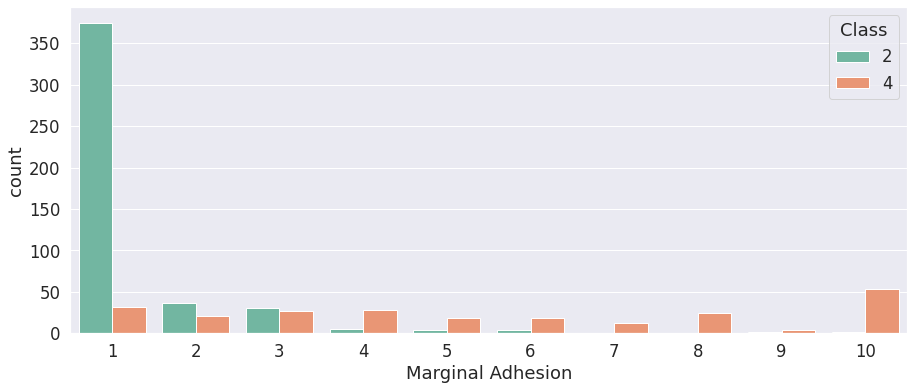

In [20]:
plt.figure(figsize=(15,6))
sns.set(font_scale = 1.5)
sns.countplot(x = 'Marginal Adhesion', hue = 'Class', data = ds, palette = 'Set2')

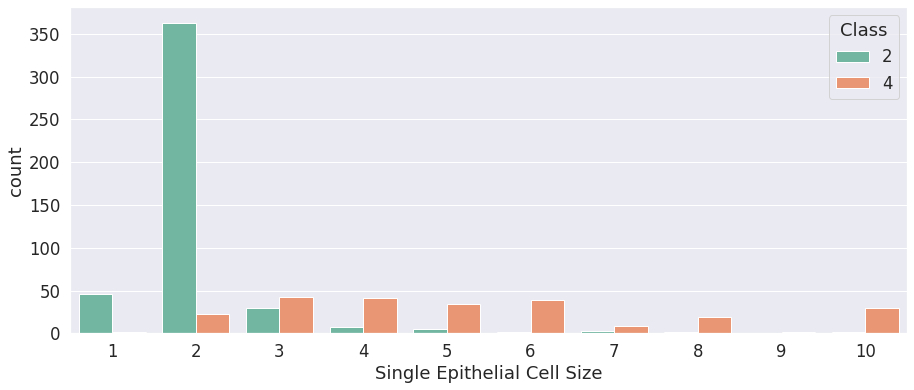

In [21]:
plt.figure(figsize=(15,6))
sns.set(font_scale = 1.5)
sns.countplot(x = 'Single Epithelial Cell Size', hue = 'Class', data = ds, palette = 'Set2')

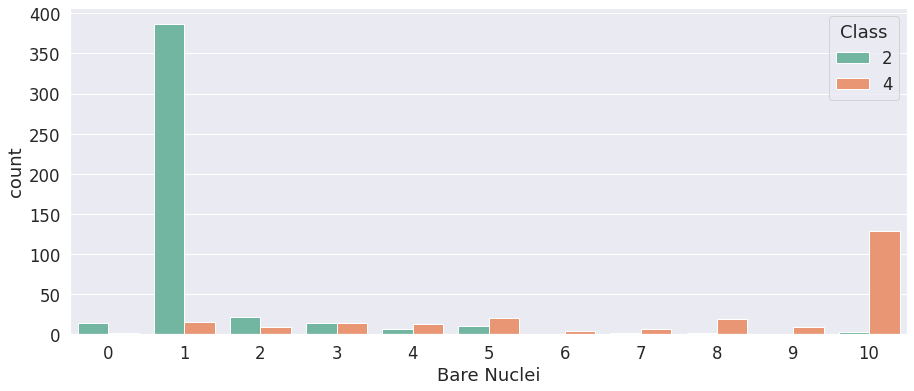

In [22]:
plt.figure(figsize=(15,6))
sns.set(font_scale = 1.5)
sns.countplot(x = 'Bare Nuclei', hue = 'Class', data = ds, palette = 'Set2')

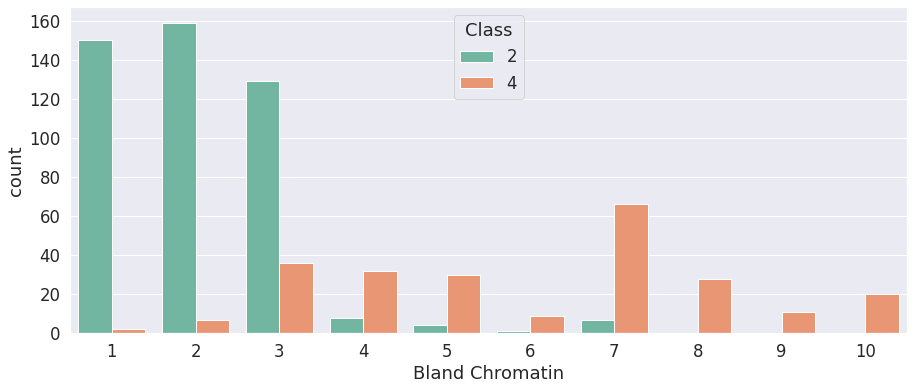

In [23]:
plt.figure(figsize=(15,6))
sns.set(font_scale = 1.5)
sns.countplot(x = 'Bland Chromatin', hue = 'Class', data = ds, palette = 'Set2')

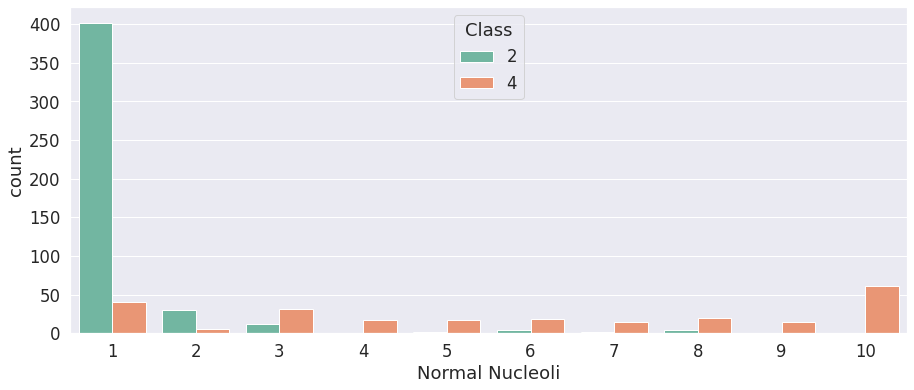

In [24]:
plt.figure(figsize=(15,6))
sns.set(font_scale = 1.5)
sns.countplot(x = 'Normal Nucleoli', hue = 'Class', data = ds, palette = 'Set2')

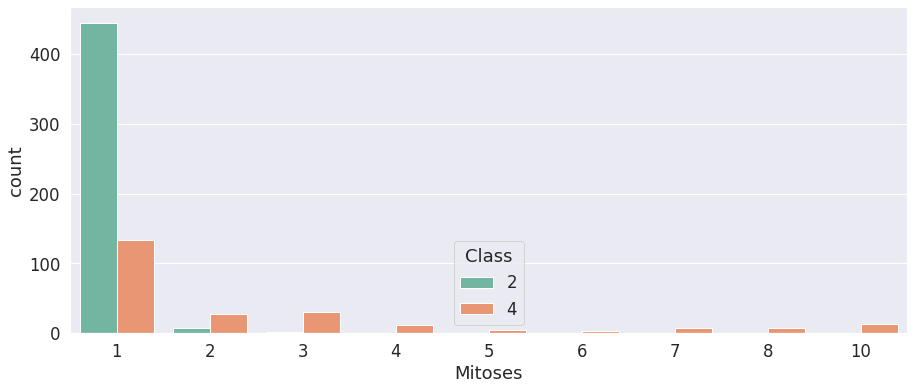

In [25]:
plt.figure(figsize=(15,6))
sns.set(font_scale = 1.5)
sns.countplot(x = 'Mitoses', hue = 'Class', data = ds, palette = 'Set2')

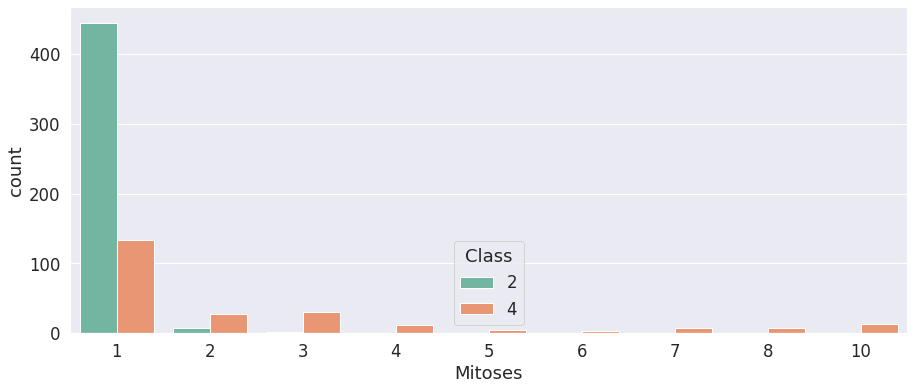

In [26]:
plt.figure(figsize=(15,6))
sns.set(font_scale = 1.5)
sns.countplot(x = 'Mitoses', hue = 'Class', data = ds, palette = 'Set2')


<h3> ⚛ Our First method : Classification


<h4>Splitting the dataset into the Training set and Test set

 داخل مقاله به اختصاص دادن ۱۰ درصد دیتا به داده تست اشاره شده بود - با ۲۵ درصد داده تست به دقت ۹۶درصد رسیدیم .\

In [27]:
from sklearn.model_selection import train_test_split
X = ds.iloc[:, :-1].values
y = ds.iloc[:, -1].values  

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.1, random_state = 0)

<h3>Feature Scaling

In [28]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)


<h3>Training the Decision Tree Classification model on the Training set

In [29]:
from sklearn.tree import DecisionTreeClassifier
classifier = DecisionTreeClassifier(criterion = 'entropy', random_state = 0)
classifier.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', random_state=0)

In [30]:
from sklearn.metrics import confusion_matrix, accuracy_score
y_pred = classifier.predict(X_test)
cm = confusion_matrix(y_test, y_pred)
print(cm)
accuracy_score(y_test, y_pred)

[[41  3]
 [ 2 24]]


0.9285714285714286

 <h2> ⚛ Second Method : Support Vector Machine (SVM)

<h5>Splitting the dataset into the Training set and Test set

In [31]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 0)

In [32]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [33]:
from sklearn.svm import SVC
classifier = SVC(kernel = 'linear', random_state = 0)
classifier.fit(X_train, y_train)


SVC(kernel='linear', random_state=0)

In [34]:
from sklearn.metrics import confusion_matrix, accuracy_score
y_pred = classifier.predict(X_test)
cm = confusion_matrix(y_test, y_pred)
print(cm)
accuracy_score(y_test, y_pred)

[[108   4]
 [  3  60]]


0.96

<h3> ⚛ 3th Method : Naive Bayes

In [35]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 0)

In [36]:
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [37]:
from sklearn.naive_bayes import GaussianNB
classifier = GaussianNB()
classifier.fit(X_train, y_train)

GaussianNB()

In [38]:
from sklearn.metrics import confusion_matrix, accuracy_score
y_pred = classifier.predict(X_test)
cm = confusion_matrix(y_test, y_pred)
print(cm)
accuracy_score(y_test, y_pred)
     

[[106   6]
 [  2  61]]


0.9542857142857143

<h3>⚛ 4th Method (optional- for test) XGBoost :

In [39]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

<h5>Training XGBoost on the Training set :


In [40]:
from xgboost import XGBClassifier
classifier = XGBClassifier()
classifier.fit(X_train, y_train)

XGBClassifier()

<h5>Making the Confusion Matrix

In [41]:
from sklearn.metrics import confusion_matrix, accuracy_score
y_pred = classifier.predict(X_test)
cm = confusion_matrix(y_test, y_pred)
print(cm)
accuracy_score(y_test, y_pred)

[[83  2]
 [ 1 54]]


0.9785714285714285

<h5>Applying k-Fold Cross Validation

In [42]:
from sklearn.model_selection import cross_val_score
accuracies = cross_val_score(estimator = classifier, X = X_train, y = y_train, cv = 10)
print("Accuracy: {:.2f} %".format(accuracies.mean()*100))
print("Standard Deviation: {:.2f} %".format(accuracies.std()*100))

Accuracy: 96.24 %
Standard Deviation: 2.33 %


<h3>Logistic Regression

<h5>Splitting the dataset into the Training set and Test set

In [44]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 0)

<h5> Feature Scaling

In [45]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

<h5>Training the Logistic Regression model on the Training set

In [46]:
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression(random_state = 0)
classifier.fit(X_train, y_train)

LogisticRegression(random_state=0)

In [47]:
from sklearn.metrics import confusion_matrix, accuracy_score
y_pred = classifier.predict(X_test)
cm = confusion_matrix(y_test, y_pred)
print(cm)
accuracy_score(y_test, y_pred)

[[109   3]
 [  3  60]]


0.9657142857142857

<h3>K-Nearest Neighbors (K-NN)

<h5>Splitting the dataset into the Training set and Test set

In [48]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 0)

<h5>Feature Scaling

In [49]:
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)


<h5>Training the K-NN model on the Training set

In [50]:
from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier(n_neighbors = 5, metric = 'minkowski', p = 2)
classifier.fit(X_train, y_train)

KNeighborsClassifier()

<h5>Making the Confusion Matrix


In [51]:
from sklearn.metrics import confusion_matrix, accuracy_score
y_pred = classifier.predict(X_test)
cm = confusion_matrix(y_test, y_pred)
print(cm)
accuracy_score(y_test, y_pred)

[[110   2]
 [  2  61]]


0.9771428571428571